# Cognitive Intelligence and Knowledge Based Classification and Reasoning

#### Importing Libraries, basic visualisation and preprocessing

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes

In [2]:
#variables
num_clusters = 6
url="https://raw.githubusercontent.com/mahakbansal/Cognitive-Classification-and-Reasoning/master/feb-2019-survey-final.csv"

In [3]:
#read data from url into a dataframe
df = pd.read_csv(url)

In [4]:
# Columns and their types
df.dtypes

Timestamp                                                                                                                                           object
Email Address                                                                                                                                       object
College Name?                                                                                                                                       object
Current Branch?                                                                                                                                     object
Current Year?                                                                                                                                       object
What is your Grade in College (GPA)?                                                                                                               float64
How would you rate your puzzle solving efficiency?                    

In [5]:
#Data preprocessing
df.drop_duplicates(subset ="Email Address", keep = 'last', inplace = True) 
df = df.loc[df['College Name?'] == 'Pune Institute of Computer Technology']

#dfemail: retains the email id for future mapping
dfemail = df.copy()

df = df.drop(['Timestamp','Email Address','Current Branch?', 'Current Year?'], axis = 1)
df = df.drop(['College Name?'], axis = 1)

In [6]:
# Displays descriptive stats for all columns
df.describe()

,What is your Grade in College (GPA)?
count,69.000000
mean,8.712029
std,0.574153
min,7.000000
25%,8.400000
50%,8.800000
75%,9.110000
max,9.990000


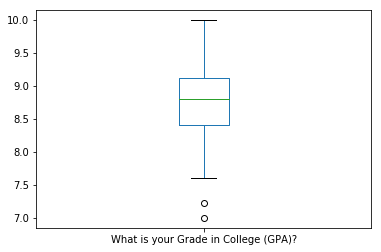

In [7]:
df.plot(kind='box')

In [8]:
df.dtypes

What is your Grade in College (GPA)?                                                                                                               float64
How would you rate your puzzle solving efficiency?                                                                                                  object
Have you prepared for any olympiads/national level competitive examinations in your school days?                                                    object
Have you actively participated in activities like chess or abacus etc?                                                                              object
Have you been "extensively" involved in the following? [Competitive Coding]                                                                         object
Have you been "extensively" involved in the following? [Sodtware Development]                                                                       object
Have you been "extensively" involved in the following? [ML/AI Projects

In [9]:
df.head()

,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9.99,Average,Not Participated,No,No,No,No,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,9.40,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,9.37,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,9.20,Average,Participated and Prepared,No,No,No,Yes,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,9.32,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [10]:
# dataframe to store only categorical attributes
dfcat = df.loc[:, df.columns != 'What is your Grade in College (GPA)?']

In [11]:
# Categorical boolean mask
categorical_feature_mask = dfcat.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = dfcat.columns[categorical_feature_mask].tolist()

In [13]:
# instantiate labelencoder object
le = LabelEncoder()

In [14]:
#Display categorical columns in dataframe
dfcat[categorical_cols]

,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",What are your plans after your undergraduation?,...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,Average,Not Participated,No,No,No,No,No,No,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,Average,Participated and Prepared,No,No,No,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,"Masters in foreign country (US, Canada etc.)",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer
5,High,Not Participated,No,Yes,No,No,Yes,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
6,Average,Not Participated,No,No,No,No,No,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,No,Prefer,Prefer,Do not prefer
7,Average,Not Participated,No,No,Yes,No,No,No,Yes,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Do not prefer,Do not prefer
8,Average,Not Participated,No,No,Yes,No,No,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
9,Average,Participated and Prepared,Yes,No,Yes,Yes,Yes,Yes,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,Yes,Yes,Prefer,Prefer,Prefer


In [15]:
# apply le on categorical feature columns
dfcat[categorical_cols] = dfcat[categorical_cols].apply(lambda col: le.fit_transform(col))

/home/mahak/.local/lib/python3.5/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [16]:
#Display encoded Categorical values in dataframe
dfcat[categorical_cols].head()

,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",What are your plans after your undergraduation?,...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,1,1,0,1,...,0,0,1,1,1,0,0,1,1,1
2,0,1,0,0,1,1,0,0,0,4,...,0,1,1,1,0,1,0,0,1,1
3,0,1,0,0,0,1,0,0,0,4,...,0,0,1,1,0,1,0,1,1,1
4,0,1,0,1,1,0,1,1,0,4,...,1,1,1,1,1,0,1,1,1,1


In [17]:
#Add a gpa column in categorical dataframe and convert to a categorical bin
dfcat.insert(loc=0, column='GPA', value=df['What is your Grade in College (GPA)?'])
bin = [-1,0,7,7.5,8,8.25,8.5,8.75,9,9.25,9.5,10]
category = pd.cut(dfcat['GPA'],bin)
dfcat.insert(loc=0, column='Binned GPA', value=category)

In [18]:
dfcat.head(14)

,Binned GPA,GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,"(9.5, 10.0]",9.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(9.25, 9.5]",9.40,1,0,0,1,1,0,1,1,...,0,0,1,1,1,0,0,1,1,1
2,"(9.25, 9.5]",9.37,0,1,0,0,1,1,0,0,...,0,1,1,1,0,1,0,0,1,1
3,"(9.0, 9.25]",9.20,0,1,0,0,0,1,0,0,...,0,0,1,1,0,1,0,1,1,1
4,"(9.25, 9.5]",9.32,0,1,0,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
5,"(7.5, 8.0]",8.00,1,0,0,1,0,0,1,0,...,1,0,0,1,1,1,0,1,1,0
6,"(7.5, 8.0]",7.60,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
7,"(8.75, 9.0]",9.00,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
8,"(8.75, 9.0]",8.79,0,0,0,0,1,0,0,0,...,1,1,0,1,1,1,0,1,1,0
9,"(8.25, 8.5]",8.40,0,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [19]:
dfcat['Binned GPA'] = dfcat['Binned GPA'].astype('str') 
dfcat['Binned GPA'] = dfcat['Binned GPA'].map({'(-1.0, 0.0]': 0,'(0.0, 7.0]': 0, '(7.0, 7.5]': 1, '(7.5, 8.0]': 2, '(8.0, 8.25]': 3, '(8.25, 8.5]': 4, '(8.5, 8.75]': 5, '(8.75, 9.0]': 6, '(9.0, 9.25]': 7, '(9.25, 9.5]': 8, '(9.5, 10.0]': 9})
dfcat = dfcat.drop(['GPA'], axis = 1)
dfcat.isnull().values.any()

/home/mahak/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/mahak/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False

### Apply kmodes on the preprocessed data

In [20]:
df_dummy = pd.get_dummies(dfcat)

In [21]:
#dissimilaty matrix calculation
def ss(a, b, **_):
    cost = []
    w = [1]*36
    w[1]=2
    w[2]=1.5
    w[4]=3
    w[7]=2
    w[12]=1.5
    w[20]=1.5
    w[27]=2
    w[32]=1.5
    for i in range(0,len(a)):
        row_cost = 0
        for j in range(0,len(a[i])):
            if(a[i][j]!=b[j]):
                row_cost+=abs(a[i][j]-b[j])*w[j]
        cost.append(row_cost)
        
    return np.array(cost)

#### Algorithm for finding the appropriate number of clusters

In [22]:
run_elbow = 0
df_dummy = df_dummy.iloc[1:,:]
dfemail = dfemail.iloc[1:,:]

if(run_elbow):
    xx=[]
    yy=[]
    num_init=20
    for i in range(1,11):
        km = KModes(n_clusters=i, init='Huang', n_init=num_init, verbose=0, cat_dissim=ss)
        clusters = km.fit_predict(df_dummy)
        print("Clusters: ",i," n_init: ",num_init," Best cost: ",km.cost_)
        xx.append(i)
        yy.append(km.cost_)
    plt.plot(xx,yy,'go-',label='Cluster vs Cost')
    plt.show()
else:
    km = KModes(n_clusters=num_clusters, init='Huang', n_init=40, verbose=0, cat_dissim=ss)
    clusters = km.fit_predict(df_dummy)
    print("Clusters: ",num_clusters," n_init: ",40," Best cost: ",km.cost_)
    df_dummy['clusters'] = clusters

Clusters:  6  n_init:  40  Best cost:  752.0


In [23]:
km.cluster_centroids_

array([[2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 4, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0],
       [6, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0],
       [8, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [6, 0, 1, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [4, 1, 1, 0, 1, 1, 1, 1, 0, 0, 4, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0]])

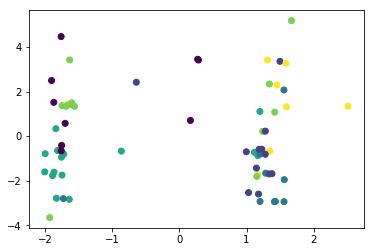

In [24]:
# Principal Component Analysis for dimentionality reduction
pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dummy.iloc[:,:-1])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy["clusters"])
plt.show()


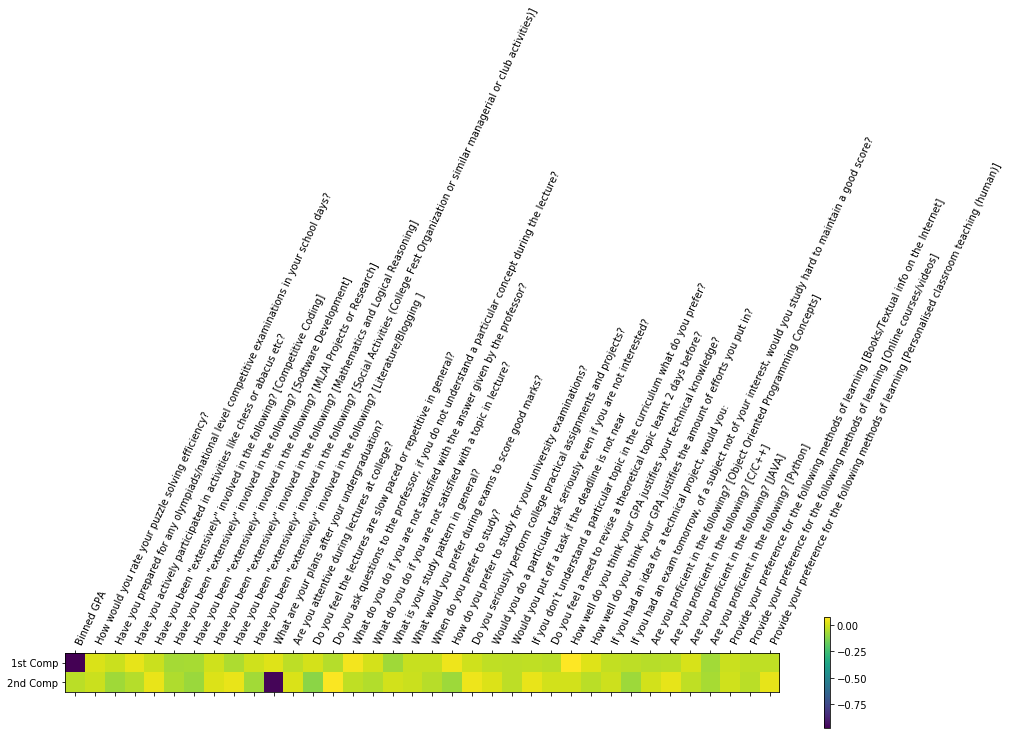

In [25]:
# Heatmap for feature weightage visualisation

categorical_cols.insert(0,'Binned GPA')
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(categorical_cols)),categorical_cols,rotation=65,ha='left')
plt.show()

In [26]:
# Display results of kmodes
kmodes_labels = km.labels_
print (kmodes_labels)


arr=[]
for i in range(0,num_clusters):
    arr.append([])
for i in range(0, len(kmodes_labels)):
    arr[kmodes_labels[i]].append((dfemail.iloc[i])["Email Address"])
for i in range(0,num_clusters):
    print("Cluster ",i," :",arr[i])
    print()

[2 3 3 3 1 5 5 5 3 1 4 2 4 3 2 2 0 4 5 4 1 2 3 4 3 3 2 0 5 5 1 5 1 1 1 3 2
 3 3 1 5 1 3 3 4 4 4 0 0 0 1 0 4 4 2 5 1 1 0 0 2 4 3 3 0 0 4 1]
Cluster  0  : ['saakshi.stars@gmail.com', 'kanchan.khadse@gmail.com', 'niravsshaha@gmail.com', 'adityachalikwar@gmail.com', 'rahulmoorthy9.6@gmail.com', 'pragya.gupta1898@gmail.com', 'gadreshubham@gmail.com', 'pmmundlye1323@gmail.com', 'prajwalchandak420@gmail.com', 'mbhangale3012@gmail.com']

Cluster  1  : ['shreyashnadal@gmail.com', 'bamey2241997@gmail.com', 'ajaysabale07@gmail.com', 'himanshupalve1999@gmail.com', 'akashanandpatil219@gmail.com', 'shivamgor498@gmail.com', 'mitagok@gmail.com', 'prakashps26@gmail.com', 'aniket9190@gmail.com', 'dalviprashant0907@gmail.com', 'www.sagarb@gmail.com', 'kushteppalwar@gmail.com', 'divyajyoti.u@gmail.com']

Cluster  2  : ['abizerL123@gmail.com', 'tejasvigurav17@gmail.com', 'aditisonar1997@gmail.com', 'pragatipatil2611@gmail.com', 'juhishelar@gmail.com', 'titiksha31@gmail.com', 'neha.chaudhari71198@gmail.com'

In [27]:
# printing positive attributes of  each cluster 

kmodescent = km.cluster_centroids_
shape = kmodescent.shape
# For each cluster mode (a vector of "1" and "0")
# find and print the column headings where "1" appears.
# If no "1" appears, assign to "no-skills" cluster.
print (shape[0])
for i in range(shape[0]):
    if sum(kmodescent[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodescent[i,:]
        for j in df_dummy.columns[np.nonzero(cent)]:
            print(j)

6

cluster 0: 
Binned GPA
Have you prepared for any olympiads/national level competitive examinations in your school days?
Have you actively participated in activities like chess or abacus etc?
Have you been "extensively" involved in the following? [Mathematics and Logical Reasoning]
Have you been "extensively" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]
Have you been "extensively" involved in the following? [Literature/Blogging ]
What are your plans after your undergraduation?
Do you feel the lectures are slow paced or repetitive in general?
What do you do if you are not satisfied with the answer given by the professor? 
What do you do if you are not satisfied with a topic in lecture?
When do you prefer to study?
How do you prefer to study for your university examinations?
Would you put off a task if the deadline is not near
Do you feel a need to revise a theoretical topic learnt 2 days before?
How well do you thi